**Programmer:** python_scripts (Abhijith Warrier)

**PYTHON SCRIPT TO _GENERATE IMAGE CAPTIONS USING A PRETRAINED MODEL FROM HUGGING FACE._**. 🐍🖼️📝

This script demonstrates how to load a **Vision + Language** model (`nlpconnect/vit-gpt2-image-captioning`) from Hugging Face to automatically generate captions for images.

### 📦 Install Required Libraries

We’ll use Hugging Face transformers and torch.

In [ ]:
# Install dependencies
# !pip install transformers torch pillow --quiet

### 🧰 Import Pretrained Model and Processor

Load the feature extractor (ViT) and decoder (GPT-2).

In [3]:
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer
import matplotlib.pyplot as plt
from PIL import Image
import requests
import torch

### 📥 Load Model and Tokenizer

We’ll use a pretrained image captioning model hosted on Hugging Face.

In [4]:
# Model and tokenizer
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
feature_extractor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=768, out_features=3072, bias=True)
            (inte

### 🖼️ Load an Example Image

You can test with any local image or from a URL.

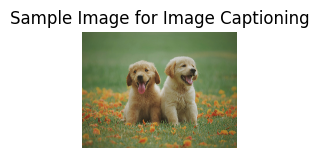

In [5]:
# Load image from a URL (sample)
url = "https://images.pexels.com/photos/1108099/pexels-photo-1108099.jpeg"
image = Image.open(requests.get(url, stream=True).raw)
plt.figure(figsize=(2, 2))   # small display window
plt.imshow(image)
plt.axis("off")
plt.title("Sample Image for Image Captioning")
plt.show()

### 🚀 Generate Caption

Extract features, run through the model, and decode into text.

In [8]:
# Preprocess image
pixel_values = feature_extractor(images=image, return_tensors="pt").pixel_values.to(device)

# Create attention mask (all ones, since no padding)
attention_mask = torch.ones(pixel_values.shape[:-1], dtype=torch.long).to(device)

# Generate caption IDs
output_ids = model.generate(pixel_values, attention_mask=attention_mask, max_length=16, num_beams=4)

# Decode IDs into text
caption = tokenizer.decode(output_ids[0], skip_special_tokens=True).strip()
print("Generated Caption:", caption)

Generated Caption: two dogs are sitting in a field with flowers
